<div class="alert alert-block alert-info">
<H2> Notebook Instructions </H2><BR>
1. Press <mark>Shift</mark> + <mark>Enter</mark> to run the cells.<BR>
2. All the Jupyter notebook and data files can be downloaded from the LMS. Please prefix your query with <mark>Support</mark> if you are facing issues in locating the files. If you are watching offline, then reach out to your support manager at <mark>support@quantinsti.com.</mark><BR>
3. If you are new to Jupyter notebook, then read <a href= "https://blog.quantinsti.com/jupyter-notebook-tutorial-installation-components-magic-commands/">this guide</a>.
</div>

## Beta Calculations

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import pandas as pd

import warnings
warnings.simplefilter("ignore")

from data import get_stock_data

start_date = '2016-1-1'
end_date = '2022-10-1'

data = pd.DataFrame()
data['NESTLEIND.NS'] = get_stock_data('NESTLEIND.NS',start_date,end_date)['Close']
data['^NSEI'] = get_stock_data('^NSEI',start_date,end_date)['Close']

data.tail(2)

C:\Users\academy\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\academy\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\academy\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NESTLEIND.NS,^NSEI
Date,,
2022-09-29,18979.150391,16818.099609
2022-09-30,19144.800781,17094.349609


$$ 
    Stock\ returns_i = \alpha + \beta * Market\ returns_i
$$

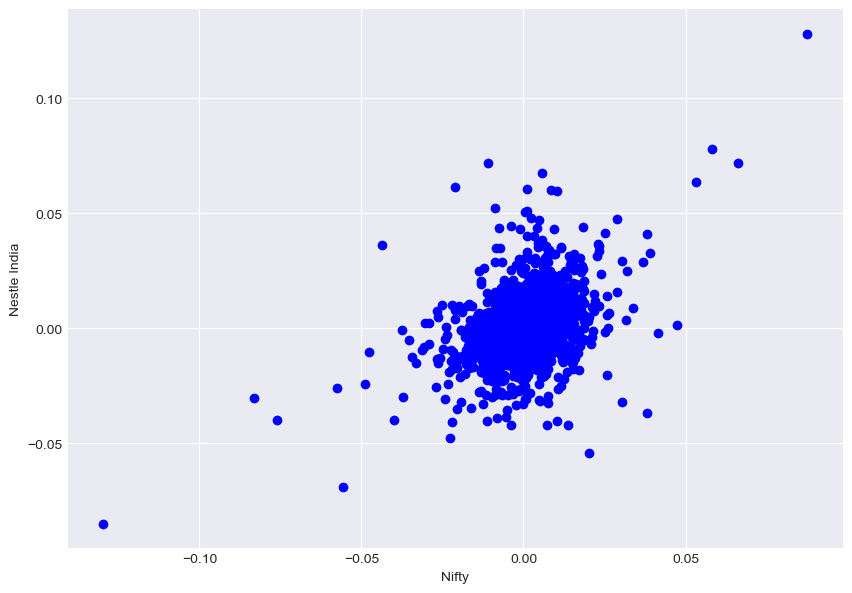

In [2]:
data_pc = data.pct_change().dropna()
plt.figure(figsize=(10,7))
plt.scatter(data_pc['^NSEI'], data_pc['NESTLEIND.NS'], color='b')
plt.ylabel('Nestle India')
plt.xlabel('Nifty')
plt.show()

In [3]:
import statsmodels.api as sm
line = sm.OLS(data_pc['NESTLEIND.NS'],data_pc['^NSEI'])
line = line.fit()
beta = line.params[0]
f"The beta is {round(beta,2)}"

'The beta is 0.52'

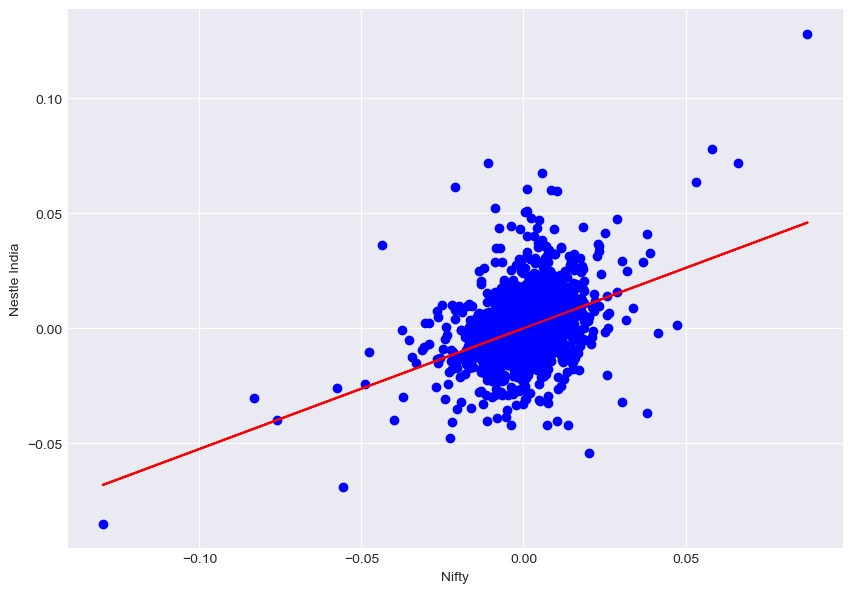

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(data_pc['^NSEI'], data_pc['NESTLEIND.NS'], color='b')
x = data_pc['^NSEI']
plt.plot(x, beta*x, color='r')
plt.ylabel('Nestle India')
plt.xlabel('Nifty')
plt.show()

## Reference
[Beta Calculations](https://financetrain.com/calculating-beta-using-market-model-regression-slope/)